In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
train = pd.read_csv('train_updated.csv')
test = pd.read_csv('test_updated.csv')

In [5]:
train.head()

,Age,Gender,City,Education_Level,Is_promoted,Attrition,Salary,Total Business Value,RatingChange
0,28,Male,C23,Master,No,1,57387.0,1715580,Same
1,43,Male,C13,Master,No,1,65603.0,350000,Same
2,29,Male,C9,College,No,1,46368.0,120360,Same
3,34,Male,C2,College,No,1,70656.0,0,Same
4,35,Male,C23,Master,No,1,28116.0,2607180,Decreased


In [6]:
pd.set_option('display.max_columns',None)

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
train.dtypes

Age                       int64
Gender                   object
City                     object
Education_Level          object
Is_promoted              object
Attrition                 int64
Salary                  float64
Total Business Value      int64
RatingChange             object
dtype: object

In [10]:
Y=train[['Attrition']]
X=train.drop(['Attrition'],axis=1)

In [11]:
Y.mean()

Attrition    0.985366
dtype: float64

In [12]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

In [15]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.9,0.99])

,Age,Salary,Total Business Value
count,1640.000000,1640.000000,1.640000e+03
mean,32.918902,55542.965124,2.203978e+06
std,5.930872,27065.784476,4.705356e+06
min,21.000000,10747.000000,-1.385530e+06
1%,22.000000,12954.670000,0.000000e+00
5%,24.000000,19051.250000,0.000000e+00
10%,26.000000,23164.300000,0.000000e+00
25%,29.000000,36117.500000,0.000000e+00
50%,32.000000,51663.500000,4.582250e+05
75%,37.000000,70169.500000,2.345702e+06


In [16]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num),index=num.index, columns=num.columns).add_suffix('_Rank')
num_binned.tail()

,Age_Rank,Salary_Rank,Total Business Value_Rank
1635,2.0,9.0,1.0
1636,1.0,1.0,1.0
1637,6.0,0.0,1.0
1638,9.0,2.0,5.0
1639,2.0,7.0,3.0


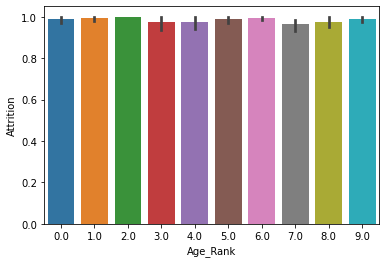

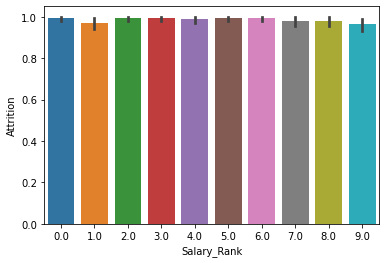

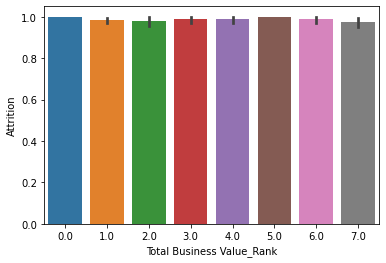

In [18]:
X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=Y.mean(),data=X_bin_combined,color='red')
    sns.barplot(x=col, y="Attrition",data=X_bin_combined, estimator=mean )
plt.show()

In [26]:
X

,Age,Gender,City,Education_Level,Is_promoted,Salary,Total Business Value,RatingChange
0,28,Male,C23,Master,No,57387.0,1715580,Same
1,43,Male,C13,Master,No,65603.0,350000,Same
2,29,Male,C9,College,No,46368.0,120360,Same
3,34,Male,C2,College,No,70656.0,0,Same
4,35,Male,C23,Master,No,28116.0,2607180,Decreased
...,...,...,...,...,...,...,...,...
1635,28,Male,C26,College,No,95133.0,0,Same
1636,26,Male,C19,Bachelor,No,29582.0,0,Same
1637,34,Female,C9,College,No,12105.0,0,Same
1638,44,Male,C19,College,No,35370.0,2815090,Decreased


In [25]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

ValueError: could not convert string to float: 'Male'

     |████████████████████████████████| 189 kB 4.1 MB/s eta 0:00:01
